<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session4/BMEN35_Ex12_neural_netorks_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
## Fill in your name below
Albert Ahnlide

## Your mission is now the following:

You will use a dataset from OpenML (https://www.openml.org/). If you look at their webpage there are a lot of dataset that you can use. In this assignment you will use the SPECTF dataset from OpenML. (More info on this dataset can be found here: https://www.openml.org/search?type=data&sort=runs&id=337&status=active and here https://archive.ics.uci.edu/ml/datasets/SPECTF+Heart) and the original paper (https://doi.org/10.1016/S0933-3657(01)00082-3 )

You should do the following

1.   Fetch the dataset from OpenML (data_id is 337)
2.   Train a neural network (using sklearns MLPClassifier) with two hidden layers. You can try with diffrent number of neurons in the hidden layers. (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
3.   Find the accuracy, f1-score, precision, recall for the classifier
4.   Plot the ROC-curve





Some tips/hints:
*   There is a nice little api from sklearn to fetch dataset from OpenML. (fetch_openml). Easiest way to get the data is to use its id.
*   Once you get your data fetched from openML you can use data.data for your data/features and data.target for your targets/classes
*   There is some trickery to get the imported data to a numpy array
    I would use something like: `x = data.data.to_numpy()`  and` y = data.target.to_numpy()` and furthermore y is an array of string and we want it to be integers so we can change that with `y = y.astype(int)`
*   A good number of neurons for the hidden layers are in the double digits.
*   sklearn.metrics has built-in functionality to get the "metrics" you need (accuracy, f1-score, precision, recall and ROC-curve)



We will start you off with some imports and you will fill in the rest.


## When you have finished this assignment , save this notebook and submit it as assignment 4

/Users/albertahnlide/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


accuracy :  0.8628571428571429
f1 :  0.90625
recall : 0.8787878787878788
precision :  0.9354838709677419


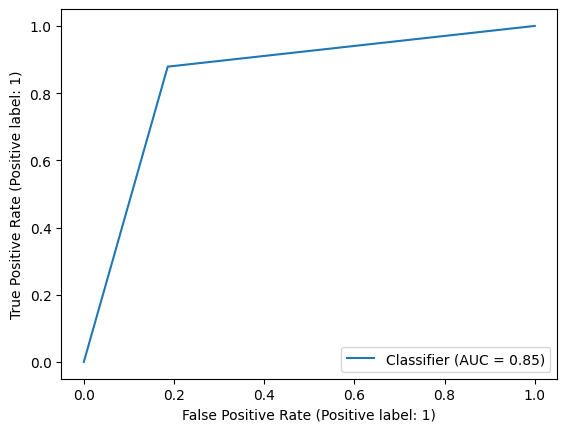

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, RocCurveDisplay

data = fetch_openml(data_id = 337)

x = data.data.to_numpy()
y = data.target.to_numpy().astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)


clf = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000).fit(x_train,y_train)
predictions = clf.predict(x_test)


accuracy = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
recall = recall_score(y_test,predictions)
precision = precision_score(y_test,predictions)

print("accuracy : ", accuracy)
print("f1 : ", f1)
print("recall :", recall)
print("precision : ", precision)


RocCurveDisplay.from_predictions(y_test,predictions)

